In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import module
import numpy as np
pd.set_option('display.max_columns', None) # to show all columns

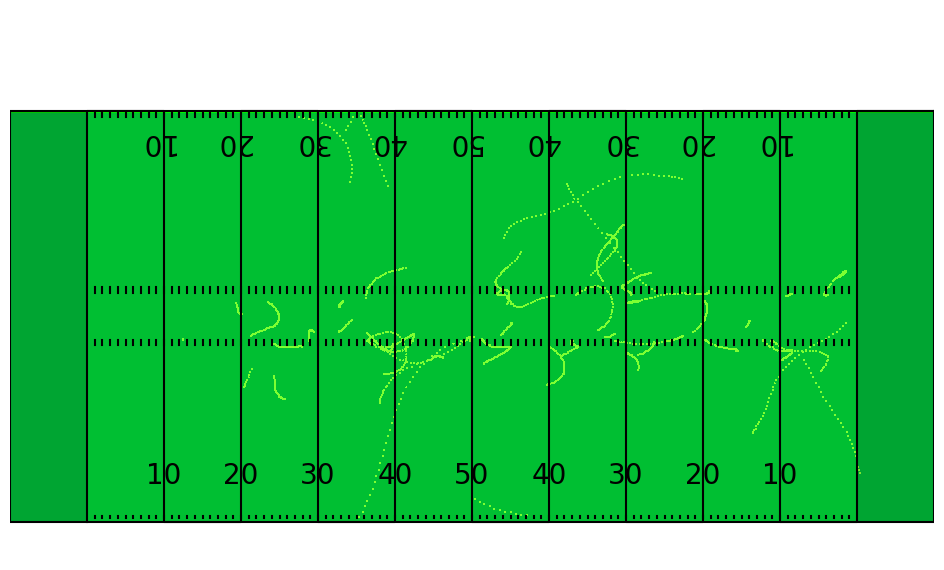

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
data_path = "data/"
player_name = "Josh Allen"
gameId = 2022090800
all_positions = module.get_positions_from_player_in_game(data_path, player_name, gameId)
x_marks = np.arange(0,120,0.1)
y_marks = np.arange(0,53.3,0.1)
field_matrix = np.zeros((len(x_marks), len(y_marks)))
for _, position in all_positions.iterrows():
    try:
        # the field is divided in 10 step sfor each yard => multiply x and y by 10 to get index 
        # of matrix element that represents that spot on the field
        field_matrix[int(np.floor(position["x"]*10)),int(np.floor(position["y"]*10))] += 1
    except IndexError:
        continue
field_matrix = (field_matrix/field_matrix.sum())*100
fig, ax = module.create_football_field()
im = ax.imshow(field_matrix.T, cmap="summer", origin="lower", extent=[-0.1,119.9,-0.1,53,2], alpha=.5, vmax=1e-10)
fig.suptitle(player_name +' ' + str(gameId), fontsize=20, color='white')
plt.show()

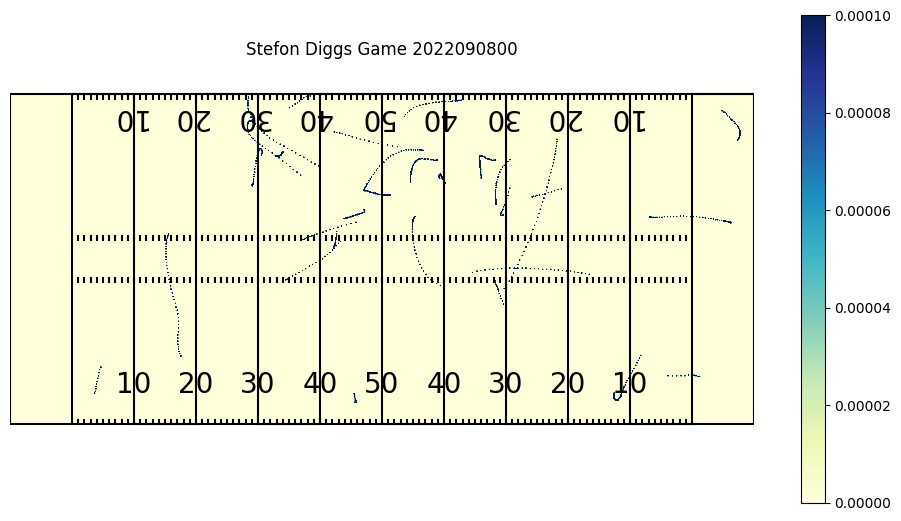

In [8]:
data_path = "data/"
player_name = "Stefon Diggs"
gameId = 2022090800
all_positions = module.get_positions_from_player_in_game(data_path, player_name, gameId)
x_marks = np.arange(0,120,0.1)
y_marks = np.arange(0,53.3,0.1)
field_matrix = np.zeros((len(x_marks), len(y_marks)))
for _, position in all_positions.iterrows():
    try:
        field_matrix[int(np.floor(position["x"]*10)),int(np.floor(position["y"]*10))] += 1
    except IndexError:
        continue
field_matrix = field_matrix/field_matrix.sum()
fig, ax = module.create_football_field()
fig.set_facecolor("None")
plt.imshow(field_matrix.T, cmap="YlGnBu", origin="lower", extent=[-0.1,119.9,-0.1,53,2])
plt.colorbar()
plt.clim(0, 1e-4)
plt.title("Stefon Diggs Game 2022090800")
plt.show()